In [2]:
!pip install kagglehub

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saharnazyaghoobpoor/happy-and-sad-image")

print("Path to dataset files:", path)

100%|██████████| 67.8M/67.8M [00:00<00:00, 126MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saharnazyaghoobpoor/happy-and-sad-image/versions/3


In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [24]:
# Constants
IMG_SIZE = 48
DATA_DIR = '/root/.cache/kagglehub/datasets/saharnazyaghoobpoor/happy-and-sad-image/versions/3'

In [25]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
train1 = os.listdir(DATA_DIR)
train2 = os.listdir(DATA_DIR)
print(f'Train1 - {train1}')
print(f'Train2 - {train2}')

Train1 - ['very-happy-people.jpg', 'happy.jpg', 'saadgirl.jpg', 'data', 'sad.jpg']
Train2 - ['very-happy-people.jpg', 'happy.jpg', 'saadgirl.jpg', 'data', 'sad.jpg']


In [36]:
data_dir = DATA_DIR
print(os.listdir(data_dir))
classes_train = os.listdir(data_dir + f"/{train1[3]}")
classes_valid = os.listdir(data_dir + f"/{train2[3]}")
print(f'Train Classes - {classes_train}')
print(f'Validation Classes - {classes_valid}')

['very-happy-people.jpg', 'happy.jpg', 'saadgirl.jpg', 'data', 'sad.jpg']
Train Classes - ['happy', 'sad']
Validation Classes - ['happy', 'sad']


In [37]:
import torchvision.transforms as transforms

# Define transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

In [38]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the datasets
train_dataset = ImageFolder(root=os.path.join(DATA_DIR, train1[3]), transform=transform)
val_dataset = ImageFolder(root=os.path.join(DATA_DIR, train2[3]), transform=transform)

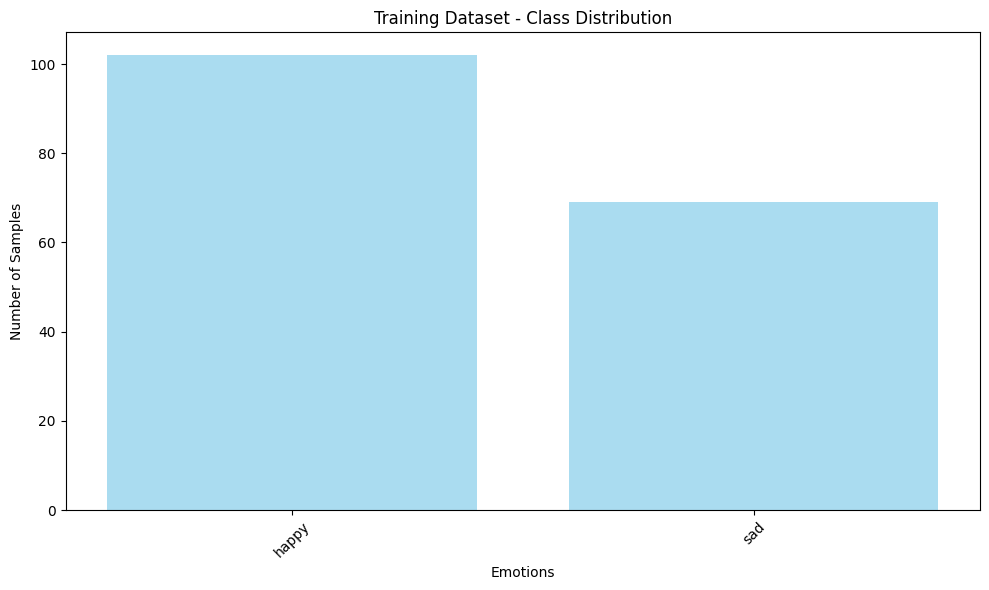

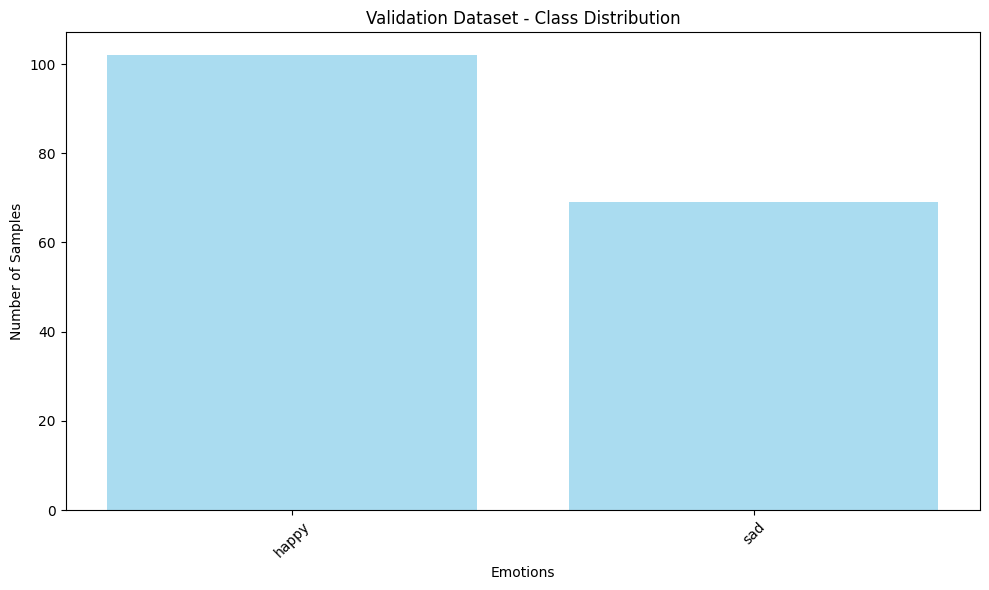

Train images shape: (171, 48, 48, 1)
Test images shape: (171, 48, 48, 1)
Train labels shape: (171, 2)
Test labels shape: (171, 2)


In [41]:
def plot_class_distribution(dataset, title):
    class_counts = {}
    for _, label in dataset:
        class_name = emotion_labels[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', alpha=0.7)
    plt.title(f'{title} - Class Distribution')
    plt.xlabel('Emotions')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return class_counts

# Define emotion_labels based on the dataset classes
emotion_labels = {i: class_name for i, class_name in enumerate(train_dataset.classes)}

train_counts = plot_class_distribution(train_dataset, 'Training Dataset')
val_counts = plot_class_distribution(val_dataset, 'Validation Dataset')

# ------------------------- Convert Dataset to NumPy Arrays -------------------------

def dataset_to_numpy(dataset, n_samples):
    images = []
    labels = []
    # Use the actual number of samples available in the dataset
    num_samples_to_extract = min(n_samples, len(dataset))
    for i in range(num_samples_to_extract):
        img_tensor, label = dataset[i]
        img_array = img_tensor.numpy().transpose(1, 2, 0)  # (1, 48, 48) → (48, 48, 1)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

# Define number of samples to extract (these values will be capped by the actual dataset size)
n_train = 5000
n_test = 3000

train_images, train_labels = dataset_to_numpy(train_dataset, n_train)
test_images, test_labels = dataset_to_numpy(val_dataset, n_test)

# Clip values (just in case)
train_images = np.clip(train_images, 0.0, 1.0)
test_images = np.clip(test_images, 0.0, 1.0)

# One-hot encode labels
train_labels_categorical = to_categorical(train_labels, num_classes=len(emotion_labels))
test_labels_categorical = to_categorical(test_labels, num_classes=len(emotion_labels))

# ------------------------- Final Shape Checks -------------------------

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels_categorical.shape}")
print(f"Test labels shape: {test_labels_categorical.shape}")

In [42]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 102.8 MB/s eta 0:00:00


In [43]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers


SAVE_PATH = ""  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator


dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]


def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out


if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


Quantum pre-processing of train images:

Quantum pre-processing of test images:


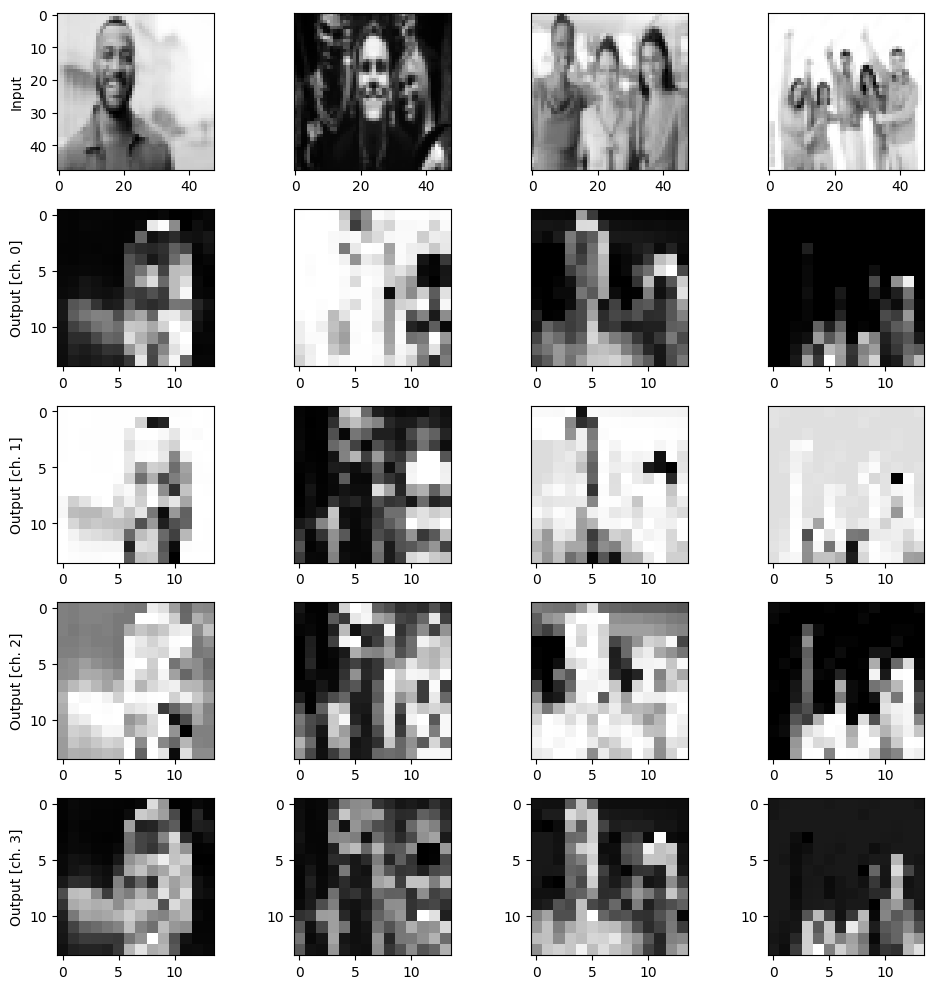

In [44]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
fig.savefig("channel_output.pdf", format='pdf')
plt.show()

In [45]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(2, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [47]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=50,
    verbose=2,
)

Epoch 1/50
43/43 - 2s - 51ms/step - accuracy: 0.6140 - loss: 0.7232 - val_accuracy: 0.6901 - val_loss: 0.5586
Epoch 2/50
43/43 - 1s - 22ms/step - accuracy: 0.7076 - loss: 0.5614 - val_accuracy: 0.7719 - val_loss: 0.4817
Epoch 3/50
43/43 - 1s - 29ms/step - accuracy: 0.7602 - loss: 0.5094 - val_accuracy: 0.7836 - val_loss: 0.4388
Epoch 4/50
43/43 - 0s - 7ms/step - accuracy: 0.7778 - loss: 0.4720 - val_accuracy: 0.8304 - val_loss: 0.4063
Epoch 5/50
43/43 - 0s - 9ms/step - accuracy: 0.7895 - loss: 0.4409 - val_accuracy: 0.8538 - val_loss: 0.3797
Epoch 6/50
43/43 - 0s - 7ms/step - accuracy: 0.8070 - loss: 0.4145 - val_accuracy: 0.8713 - val_loss: 0.3573
Epoch 7/50
43/43 - 0s - 11ms/step - accuracy: 0.8246 - loss: 0.3913 - val_accuracy: 0.8889 - val_loss: 0.3379
Epoch 8/50
43/43 - 0s - 4ms/step - accuracy: 0.8363 - loss: 0.3709 - val_accuracy: 0.9064 - val_loss: 0.3210
Epoch 9/50
43/43 - 0s - 6ms/step - accuracy: 0.8363 - loss: 0.3526 - val_accuracy: 0.9181 - val_loss: 0.3060
Epoch 10/50
43/

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report:
              precision    recall  f1-score   support

       happy       0.99      0.98      0.99       102
         sad       0.97      0.99      0.98        69

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



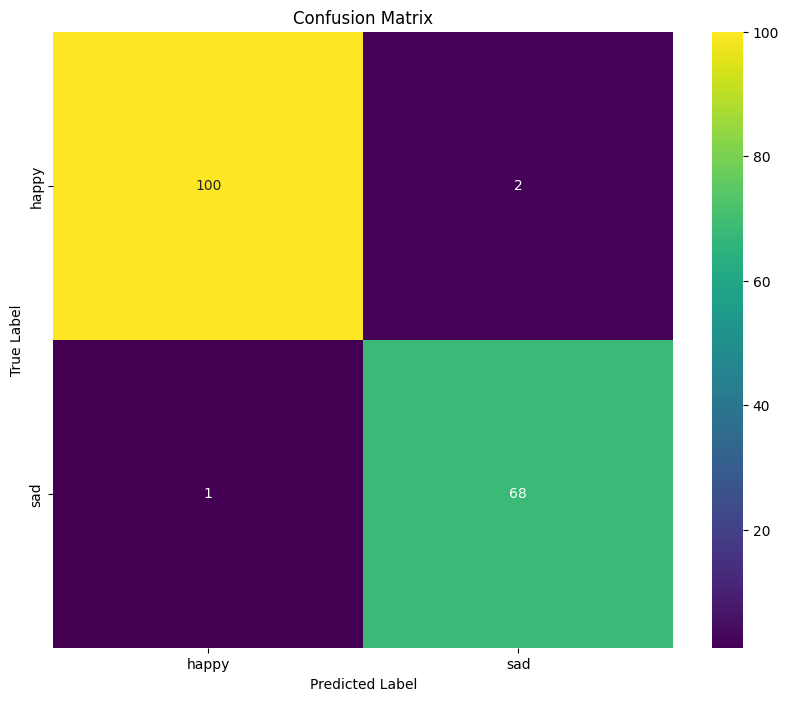

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Define the EMOTIONS list based on the emotion_labels dictionary
EMOTIONS = list(emotion_labels.values())

# Step 1: Generate predictions
y_pred = q_model.predict(q_test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_labels     # Ground truth labels

# Step 2: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=EMOTIONS))

# Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Visualize confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

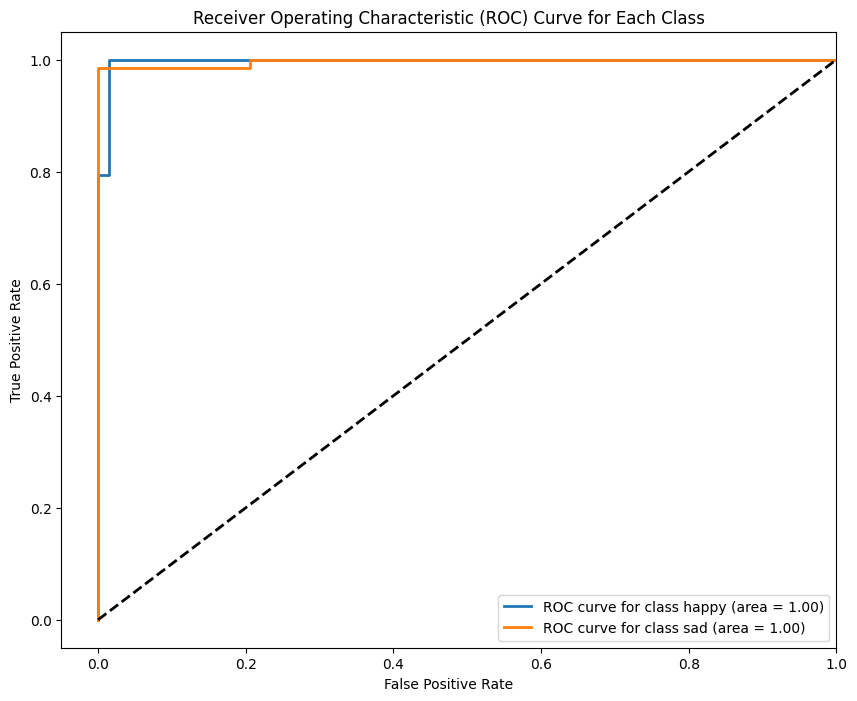

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np # Ensure numpy is imported

# Define the true labels (y_true) and predicted probabilities (y_pred) from previous steps
# y_true = test_labels
# y_pred = q_model.predict(q_test_images)

plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(len(EMOTIONS)):
    # Create binary true labels for the current class
    binary_y_true = (y_true == i).astype(int)

    # Get the predicted probabilities for the current class
    y_pred_class_prob = y_pred[:, i]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(binary_y_true, y_pred_class_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:0.2f})'.format(EMOTIONS[i], roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()